<b> Plot the basis functions of a 16x16 discrete cosine transform (DCT) </b>

A Discrete Cosine Function express a finite set of datapoints in terms of a sum of cosine functions oscillating at different frequencies. It is a liner invertible function $f:$$R^N$ -> $R^N$, or equivalently an invertible N X N square matrix. DCT is a Fourier-related transform similar to the Discrete Fourier Transform (DFT) but using only real numbers. 

There are several DCT functions with slight modifications, for this assignment I have used the following one - 

\begin{equation*}
            B_{u,v}(i, j) = C(u) * C(v) * cos(\frac{\pi (2i+1) u}{2N}) * cos(\frac{\pi (2j+1) v}{2N}) 
\end{equation*}
<br>
<center>
Where,<br> 
u and v are the different frequencies. <br>
C(u) and C(v) are $\sqrt(1/N)$ when u and v are 0 and $\sqrt(2/N)$ otherwise. <br>
</center>


In [52]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [53]:
def C(x, N):
    if x == 0:
        return math.sqrt(1/N)
    else:
        return math.sqrt(2/N)

def computeDCT(i, j, u, v, N):
    I = math.cos(((2*i+1)*(u*math.pi)) / (2*N))
    J = math.cos(((2*j+1)*(v*math.pi)) / (2*N))
    return C(u, N) * C(v, N) * I * J
    

In [83]:
def DCT(N):
    maxU = N
    maxV = N

    DCTimages = []
    points = []
    for u in range(0, N):
        for v in range(0, N):
            basis = np.zeros((N, N))
            for i in range(0, maxU):
                for j in range(0, maxV):
                    basis[i,j] = computeDCT(i, j, u, v, N)
            DCTimages.append(basis)
            points.append(basis[0])
    return DCTimages, points        

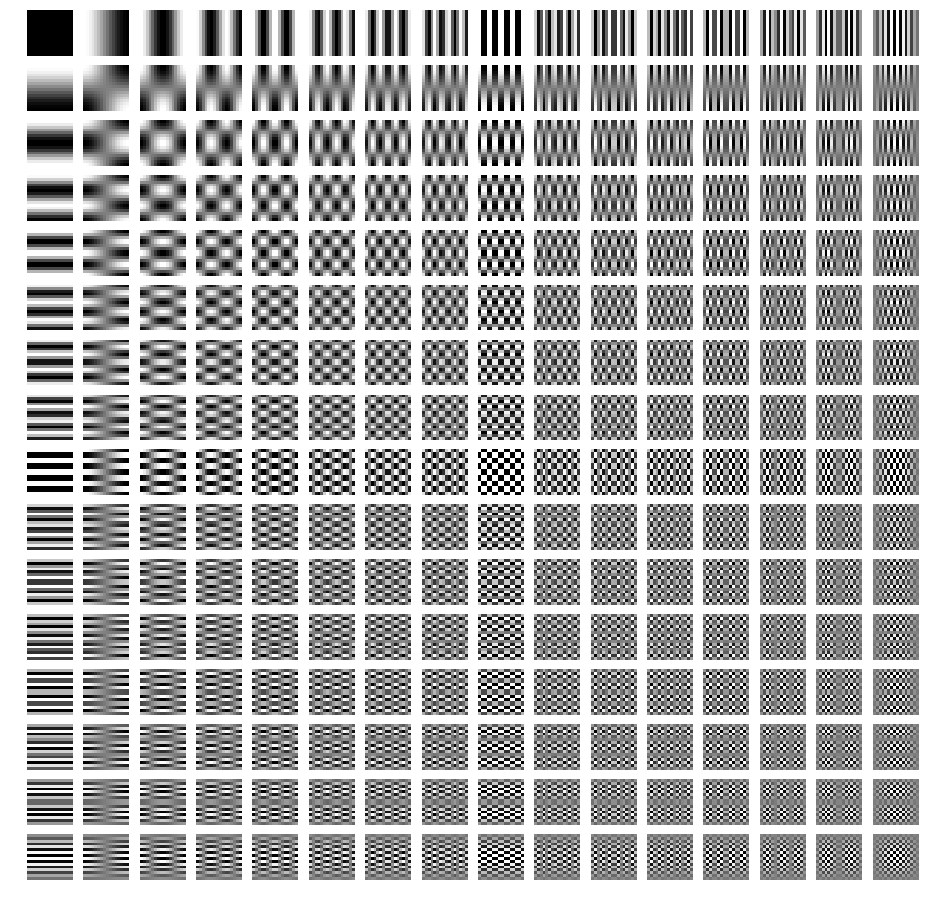

In [131]:
N = 16
DCTimages, points = DCT(N)
fig = plt.figure(figsize=(16, 16))
for i in range(0, len(DCTimages)):
    plt.subplot(N, N, i + 1)
    plt.axis('off')
    plt.imshow(DCTimages[i], cmap='gray')
plt.show()    

#### Below is the plot for the basis values

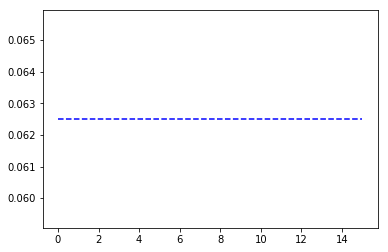

In [145]:
first = points[0]
plt.plot(first, 'b--')
plt.show()

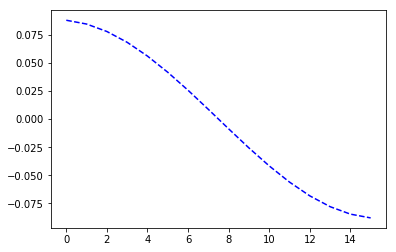

In [144]:
first = points[1]
plt.plot(first, 'b--')
plt.show()

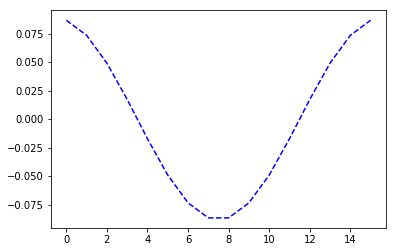

In [146]:
first = points[2]
plt.plot(first, 'b--')
plt.show()

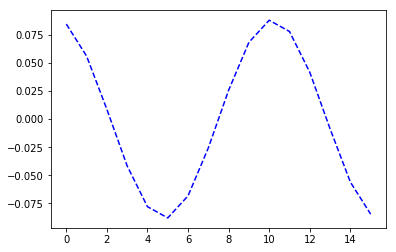

In [147]:
first = points[3]
plt.plot(first, 'b--')
plt.show()

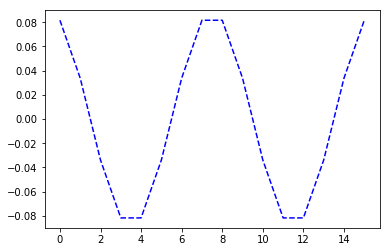

In [148]:
first = points[4]
plt.plot(first, 'b--')
plt.show()

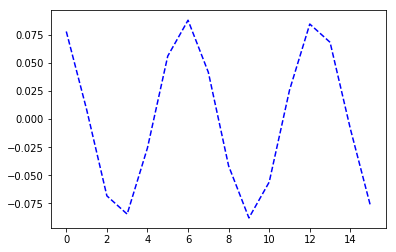

In [149]:
first = points[5]
plt.plot(first, 'b--')
plt.show()

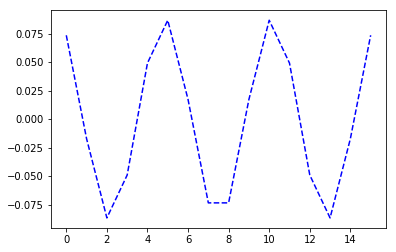

In [150]:
first = points[6]
plt.plot(first, 'b--')
plt.show()

#### Applying DCT and IDCT to an Image

Here I have used the scipy built in functions dct and idct from fftpack package. 

In [151]:
from scipy import fftpack
from PIL import Image
import matplotlib.animation as animation

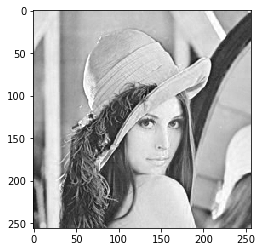

In [121]:
image = plt.imread('lena.jpg')
image = image[:,:,0]
plt.imshow(image, cmap='gray')
plt.show()

In [128]:
dct_size = image.shape[0]
dct = fftpack.dct(fftpack.dct(image.T, norm='ortho').T, norm='ortho')
reconstructed_images = []

for i in range(dct_size):
    dct_copy = dct.copy()
    dct_copy[i:, :] = 0
    dct_copy[:, i:] = 0
    
    #Reconstruct Image
    r_image = fftpack.idct(fftpack.idct(dct_copy.T, norm='ortho').T, norm='ortho')
    clipped_img = r_image.clip(0, 255)
    img = Image.fromarray(clipped_img)
    reconstructed_images.append(img)
    

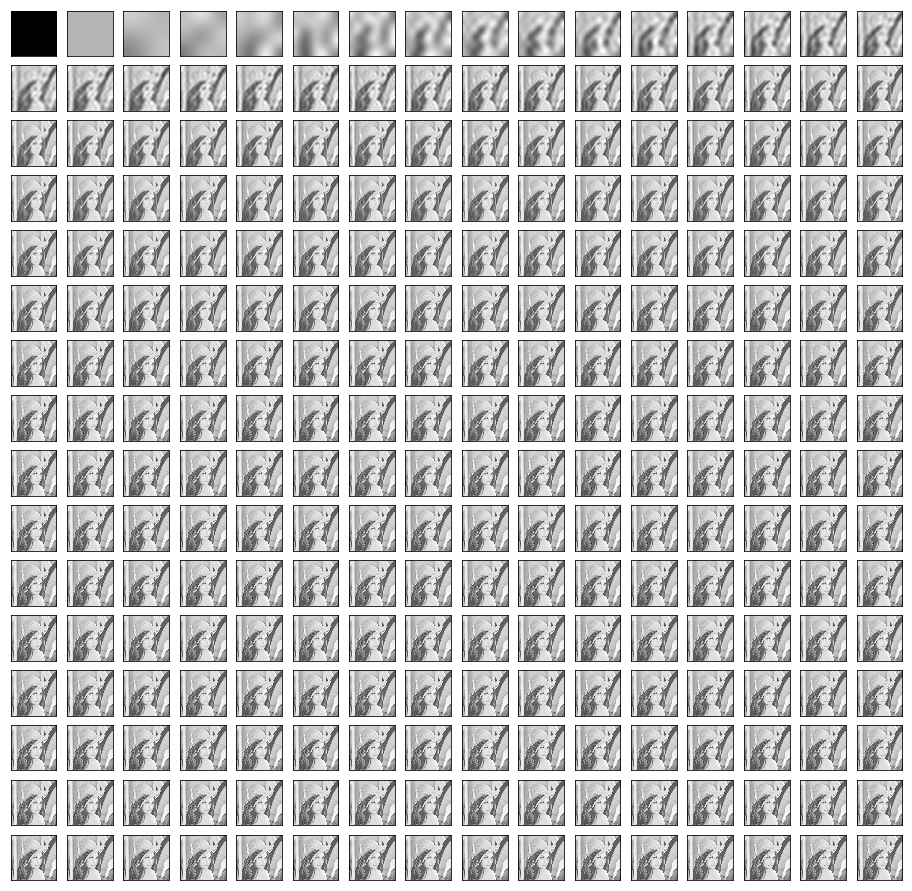

In [136]:
fig = plt.figure(figsize=(16, 16))
for i in range(256):
    plt.subplot(16, 16, i+1)
    plt.imshow(reconstructed_images[i], cmap='gray')
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
plt.show()    

From above we can see that the first 40 - 50 dct coefficients could capture most of the image. If we use these coefficients to reconstruct the image we do not loose much image quality in the process. The first coefficients are mostly color and hue differences, then it reconstructs a coarse, very approximate image. Then, with high frequency components, we could get a high quality image. This is a nice way to think about the compression in general.

DCT is good for compression of natural images, even with few coefficients you can construct the image well.